<a href="https://colab.research.google.com/github/Terence0408/Teach_code/blob/master/Deep_Learning_R_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Directly use R environment
1. Click `Edit` \ `編輯`
2. Click `Notebook settings` \ `筆記本設定`
3. At `runtime type` \ `執行階段類型`: select R

In [ ]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          3.2                         
year           2023                        
month          10                          
day            31                          
svn rev        85441                       
language       R                           
version.string R version 4.3.2 (2023-10-31)
nickname       Eye Holes                   

# Load package
Tutorial: https://tensorflow.rstudio.com/tutorials/

In [ ]:
install.packages("keras")
install.packages('reticulate') # reticulate: Reticulate: R Interface to Python
install.packages('ramify')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(keras)
library(reticulate)
library(tidyverse)
library(ramify)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘ramify’


The following object is masked from ‘package:purrr’:

    flatten


The following object is masked from ‘package:tidyr’:

    fill


The following object is masked from ‘package:graphics’:

    clip




# Regression

## Data

In [ ]:
Reg_data = read.table(
  "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
  quote = "\"",
  comment.char = "",
  stringsAsFactors = FALSE)

colnames(Reg_data) = c("mpg", "cyl", "disp", "hp", "wt", "acc", "year", "origin", "name")
Reg_data = Reg_data %>% filter(hp != '?')
Reg_data$USA = ifelse(Reg_data$origin == 1, 1, 0)
Reg_data$Europe = ifelse(Reg_data$origin == 2, 1, 0)
Reg_data$Japan = ifelse(Reg_data$origin == 3, 1, 0)

Reg_data = Reg_data %>% select(-"origin")
Reg_data = Reg_data %>% select(-"name")

Reg_data$cyl = as.numeric(Reg_data$cyl)
Reg_data$hp = as.numeric(Reg_data$hp)
Reg_data$year = as.numeric(Reg_data$year)

str(Reg_data)

'data.frame':	392 obs. of  10 variables:
 $ mpg   : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cyl   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ disp  : num  307 350 318 304 302 429 454 440 455 390 ...
 $ hp    : num  130 165 150 150 140 198 220 215 225 190 ...
 $ wt    : num  3504 3693 3436 3433 3449 ...
 $ acc   : num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year  : num  70 70 70 70 70 70 70 70 70 70 ...
 $ USA   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Europe: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Japan : num  0 0 0 0 0 0 0 0 0 0 ...


In [ ]:
X <- unname(data.matrix(Reg_data[,2:10]))
str(X)

 num [1:392, 1:9] 8 8 8 8 8 8 8 8 8 8 ...


In [ ]:
y = data.matrix(Reg_data[,1])

# normalize
y = y/max(y)

str(y)

 num [1:392, 1] 0.386 0.322 0.386 0.343 0.365 ...


## Model

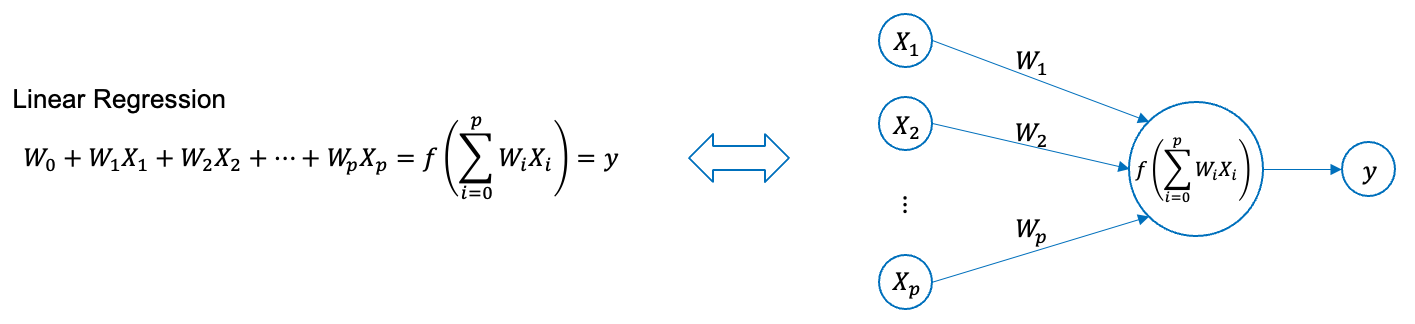




In [ ]:
# Build the Keras Sequential model
Reg_model <- keras_model_sequential()

Reg_model %>%
  layer_dense(input_shape = c(ncol(X)),
              units = ncol(y))

# Compiling the model
Reg_model %>% compile(
  loss = 'mean_squared_error',
  optimizer = optimizer_adam()) #or: SGD, RMSProp

summary(Reg_model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense (Dense)                      (None, 1)                       10          
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


In [ ]:
# Evalute the model
Reg_history <- Reg_model %>% fit(
  x = X,
  y = y,
  epochs = 200,
  verbose = 1,
  validation_split = 0.2
)

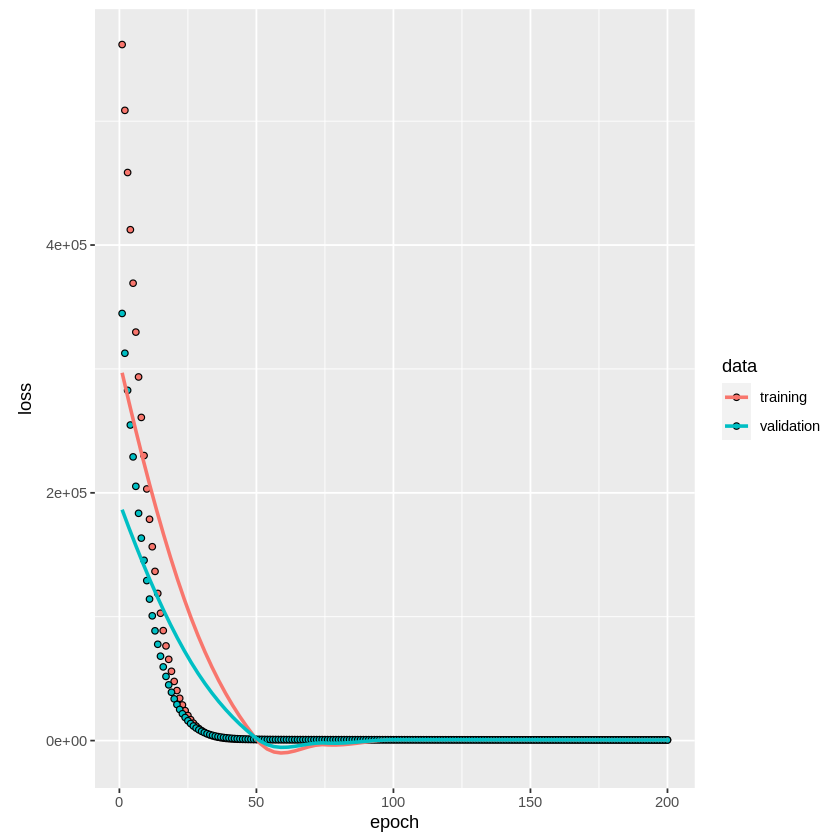

In [ ]:
plot(Reg_history)

## Prediction

In [ ]:
y_pred <- predict(Reg_model, X)
str(y_pred)

 num [1:392, 1] 25.7 36.1 31.2 25 23.7 ...


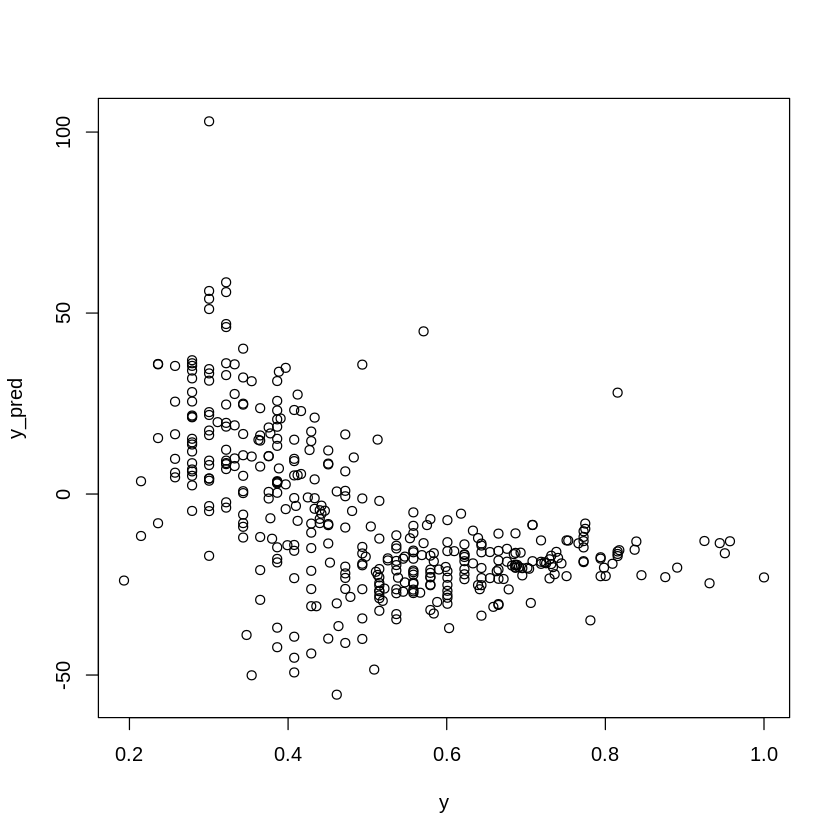

In [ ]:
plot(y, y_pred, pch=1)

# Logistic regression

## Data

In [ ]:
data(iris)

iris[,5] <- as.numeric(iris[,5]) -1

# Turn `iris` into a matrix
iris <- as.matrix(iris)

# Set iris `dimnames` to `NULL`
dimnames(iris) <- NULL


In [ ]:
X <- iris[,1:4]
str(X)

 num [1:150, 1:4] 5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...


In [ ]:
y <- iris[, 5]
y <- to_categorical(y)
str(y)
head(y)

 num [1:150, 1:3] 1 1 1 1 1 1 1 1 1 1 ...


1,0,0
1,0,0
1,0,0
1,0,0
1,0,0
1,0,0


## Model

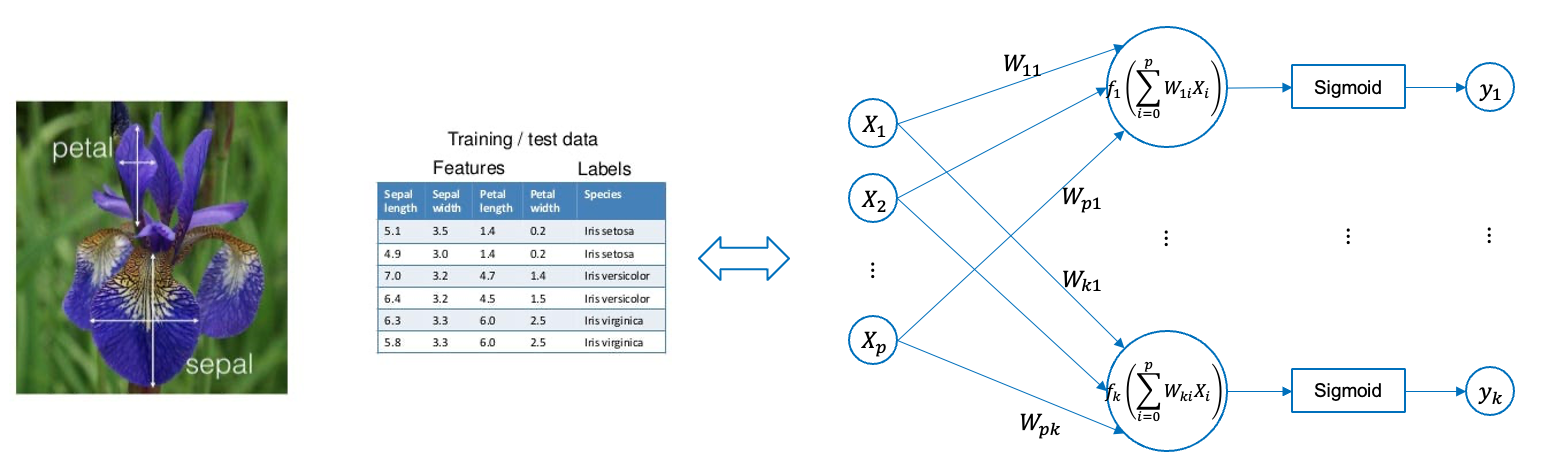

In [ ]:
# Build the Keras Sequential model
Logist_model <- keras_model_sequential()

# Add layers to the model
Logist_model %>%
    layer_dense(units = 3, activation = 'softmax', input_shape = c(4))

summary(Logist_model)

Model: "sequential_1"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1 (Dense)                    (None, 3)                       15          
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


In [ ]:
# Compiling the model
Logist_model %>% compile(
     loss = 'categorical_crossentropy',
     optimizer = 'adam',
     metrics = 'accuracy')

In [ ]:
# Evalute the model
Logist_history <- Logist_model %>% fit(
  x = X,
  y = y,
  epochs = 200,
  verbose = 1,
  validation_split = 0.2
)

## Prediction

In [ ]:
y_pred <- predict(Logist_model, X)
head(y_pred)

0.6574842,0.2268528,0.1156630
0.5927645,0.2789634,0.1282721
0.6342713,0.2414819,0.1242469
0.6183949,0.2453488,0.1362562
0.6753972,0.2095036,0.1150993
0.6577554,0.2240652,0.1181794


In [ ]:
table(argmax(y), argmax(y_pred))

   
     1  2
  1 50  0
  2  0 50
  3  0 50

# MLP

## Data

In [ ]:
library(tidyverse)

Reg_data = read.table(
  "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
  quote = "\"",
  comment.char = "",
  stringsAsFactors = FALSE)

colnames(Reg_data) = c("mpg", "cyl", "disp", "hp", "wt", "acc", "year", "origin", "name")
Reg_data = Reg_data %>% filter(hp != '?')
Reg_data$USA = ifelse(Reg_data$origin == 1, 1, 0)
Reg_data$Europe = ifelse(Reg_data$origin == 2, 1, 0)
Reg_data$Japan = ifelse(Reg_data$origin == 3, 1, 0)

Reg_data = Reg_data %>% select(-"origin")
Reg_data = Reg_data %>% select(-"name")

Reg_data$cyl = as.numeric(Reg_data$cyl)
Reg_data$hp = as.numeric(Reg_data$hp)
Reg_data$year = as.numeric(Reg_data$year)

str(Reg_data)

'data.frame':	392 obs. of  10 variables:
 $ mpg   : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cyl   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ disp  : num  307 350 318 304 302 429 454 440 455 390 ...
 $ hp    : num  130 165 150 150 140 198 220 215 225 190 ...
 $ wt    : num  3504 3693 3436 3433 3449 ...
 $ acc   : num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year  : num  70 70 70 70 70 70 70 70 70 70 ...
 $ USA   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Europe: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Japan : num  0 0 0 0 0 0 0 0 0 0 ...


In [ ]:
X <- unname(data.matrix(Reg_data[,2:10]))
str(X)

 num [1:392, 1:9] 8 8 8 8 8 8 8 8 8 8 ...


In [ ]:
y = data.matrix(Reg_data[,1])

# normalize
y = y/max(y)

str(y)

 num [1:392, 1] 0.386 0.322 0.386 0.343 0.365 ...


## Model
MLP hidden layer 可視化 https://playground.tensorflow.org/

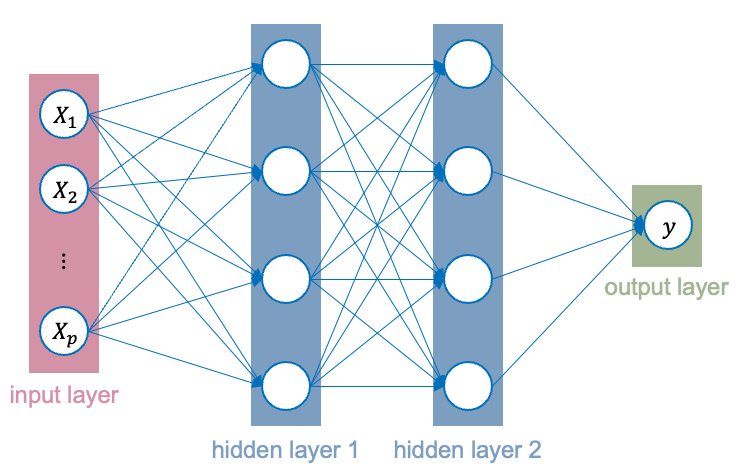

In [ ]:
# Build the Keras Sequential model
MLP_model <- keras_model_sequential()

MLP_model %>%
  layer_dense(input_shape = c(ncol(X)),
              units = 4) %>%
  layer_dense(units = 4) %>%
  layer_dense(units = ncol(y))

# Compiling the model
MLP_model %>% compile(
  loss = 'mean_squared_error',
  optimizer = optimizer_adam()) #or: SGD, RMSProp

summary(MLP_model)

Model: "sequential_2"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_4 (Dense)                    (None, 4)                       40          
 dense_3 (Dense)                    (None, 4)                       20          
 dense_2 (Dense)                    (None, 1)                       5           
Total params: 65 (260.00 Byte)
Trainable params: 65 (260.00 Byte)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


In [ ]:
# Evalute the model
MLP_history <- MLP_model %>% fit(
  x = X,
  y = y,
  epochs = 200,
  verbose = 0,
  validation_split = 0.2
)

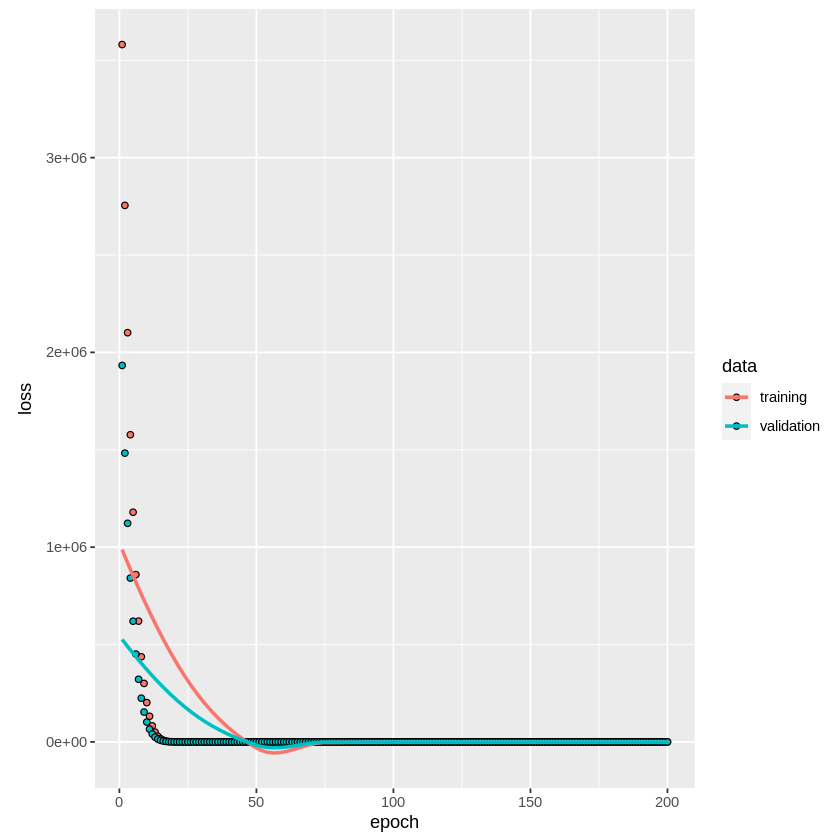

In [ ]:
plot(MLP_history)

## Model with EarlyStopping

https://cran.r-project.org/web/packages/keras/vignettes/training_callbacks.html

In [ ]:
# Build the Keras Sequential model
MLP_model_EarlyStopping <- keras_model_sequential()

MLP_model_EarlyStopping %>%
  layer_dense(input_shape = c(ncol(X)),
              units = 4) %>%
  layer_dense(units = 4) %>%
  layer_dense(units = ncol(y))

# Compiling the model
MLP_model_EarlyStopping %>% compile(
  loss = 'mean_squared_error',
  optimizer = optimizer_adam()) #or: SGD, RMSProp

summary(MLP_model_EarlyStopping)

Model: "sequential_3"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_7 (Dense)                    (None, 4)                       40          
 dense_6 (Dense)                    (None, 4)                       20          
 dense_5 (Dense)                    (None, 1)                       5           
Total params: 65 (260.00 Byte)
Trainable params: 65 (260.00 Byte)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


In [ ]:
callbacks = list(
    # Write TensorBoard logs to './logs' directory
    callback_tensorboard(),
    # Stop training when a monitored metric has stopped improving.
    callback_early_stopping(monitor ='loss', patience=3))

# Evalute the model
MLP_history <- MLP_model_EarlyStopping %>% fit(
  x = X,
  y = y,
  epochs = 200,
  verbose = 0,
  validation_split = 0.2,
  callbacks = callbacks
)

## Prediction

In [ ]:
y_pred <- predict(MLP_model, X)
str(y_pred)

 num [1:392, 1] -8.47 -7.27 -6.73 -4 -6.17 ...


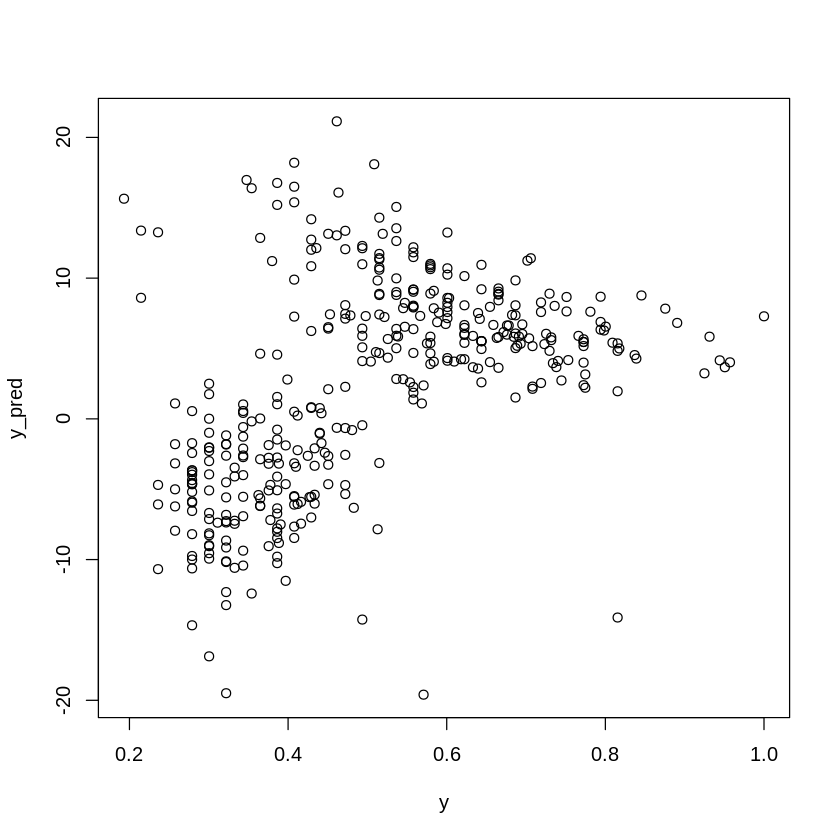

In [ ]:
plot(y, y_pred, pch=1)

# Save and Load model

In [ ]:
# Save the weights
save_model_weights_tf(MLP_model, './checkpoints/my_checkpoint')

# Restore the weights
load_model_weights_tf(MLP_model, './checkpoints/my_checkpoint')

In [ ]:
# Save the entire model as a `.keras` zip archive.
save_model_hdf5(MLP_model, "my_model.h5")

# Load the entire model
MLP_model <- load_model_hdf5("my_model.h5")

# CNN

## Data

In [ ]:
#load MNIST, split into train and test sets
mnist <- dataset_mnist()

X_train <- mnist$train$x
y_train <- mnist$train$y
X_test <- mnist$test$x
y_test <- mnist$test$y

str(X_train)
str(y_train)

 int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
 int [1:60000(1d)] 5 0 4 1 9 2 1 3 1 4 ...


 num [1:60000, 1:28, 1:28, 1] 0 0 0 0 0 0 0 0 0 0 ...


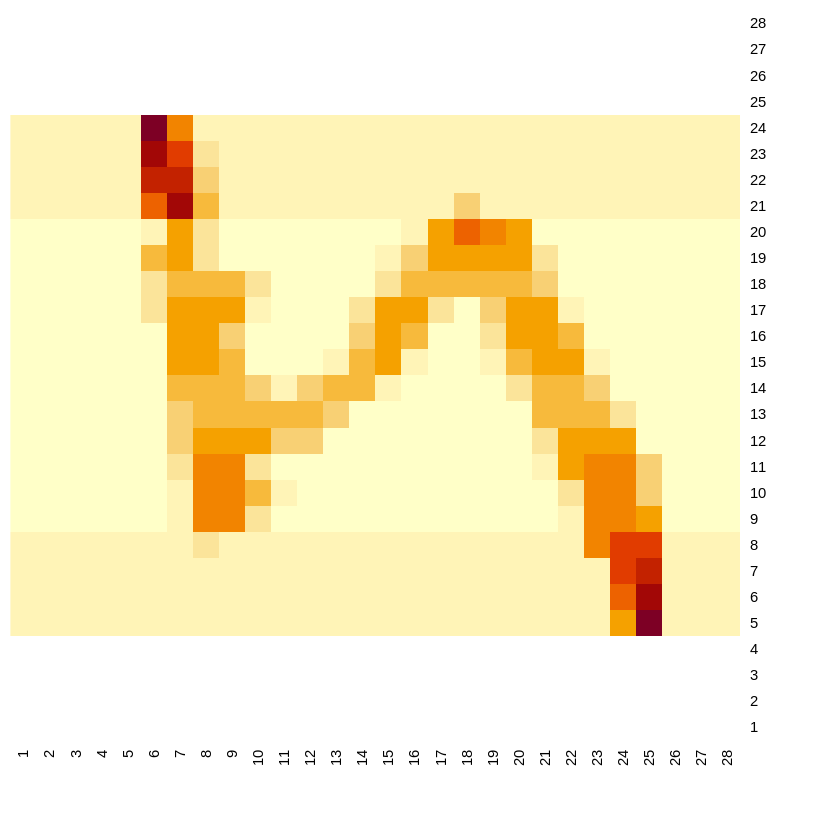

In [ ]:
X_train<- array_reshape(X_train, c(60000, 28, 28, 1))
X_test<- array_reshape(X_test, c(10000, 28, 28, 1))

# rescale to the [0,1] interval
X_train <- X_train / 255
X_test <- X_test / 255

str(X_train)
heatmap(t(X_train[1,,,]), Colv = NA, Rowv = NA)

In [ ]:
# convert class vectors to binary class matrices
y_train <- to_categorical(y_train, 10); #60000 x 10
y_test <- to_categorical(y_test, 10); #10000 x 10
str(y_train)

 num [1:60000, 1:10] 0 1 0 0 0 0 0 0 0 0 ...


## Model (LeNet)

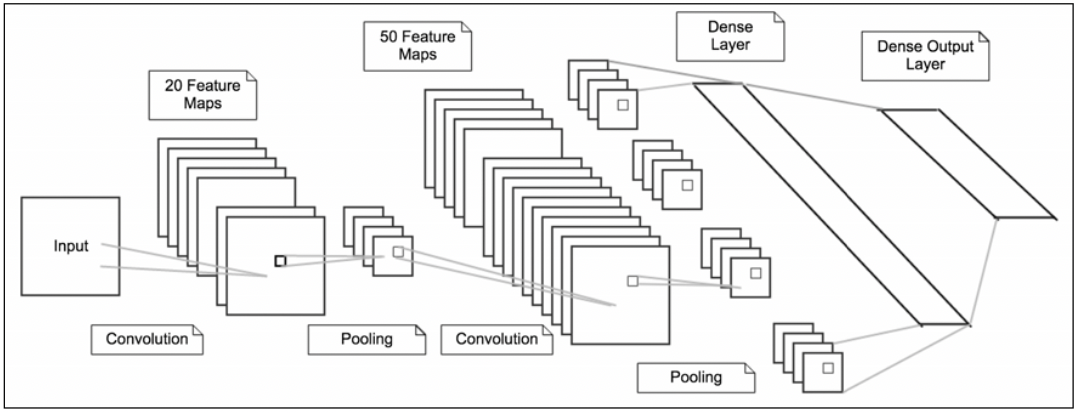

In [ ]:
# Build the Keras Sequential model
LeNet_model <- keras_model_sequential()

LeNet_model %>%
  layer_conv_2d(filters = 20, # 20 output channels (or output filters)
                kernel_size = c(5,5), # 5x5 convolution
                activation = 'relu',
                input_shape = c(28,28,1)) %>%
  layer_max_pooling_2d(pool_size = c(2,2), strides=c(2, 2)) %>%
  layer_conv_2d(filters = 50,
                kernel_size = c(5,5),
                activation = 'relu') %>%
  layer_max_pooling_2d(pool_size = c(2,2), strides=c(2, 2)) %>%
  layer_flatten() %>%
  layer_dense(units = 500, activation = 'relu') %>%
  layer_dense(units = 10, activation = 'softmax')


# compile model
LeNet_model %>% compile(
  loss = 'categorical_crossentropy', #some other options: sparse_categorical_crossentropy
  optimizer = optimizer_adam(), #or: SGD, RMSProp
  metrics = c('accuracy'))

summary(LeNet_model)

Model: "sequential_4"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d_1 (Conv2D)                  (None, 24, 24, 20)              520         
 max_pooling2d_1 (MaxPooling2D)     (None, 12, 12, 20)              0           
 conv2d (Conv2D)                    (None, 8, 8, 50)                25050       
 max_pooling2d (MaxPooling2D)       (None, 4, 4, 50)                0           
 flatten (Flatten)                  (None, 800)                     0           
 dense_9 (Dense)                    (None, 500)                     400500      
 dense_8 (Dense)                    (None, 10)                      5010        
Total params: 431080 (1.64 MB)
Trainable params: 431080 (1.64 MB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


In [ ]:
# Evalute the model
LeNet_history <- LeNet_model %>% fit(
  x = X_train,
  y = y_train,
  epochs = 5,
  verbose = 1,
  validation_split = 0.9
)

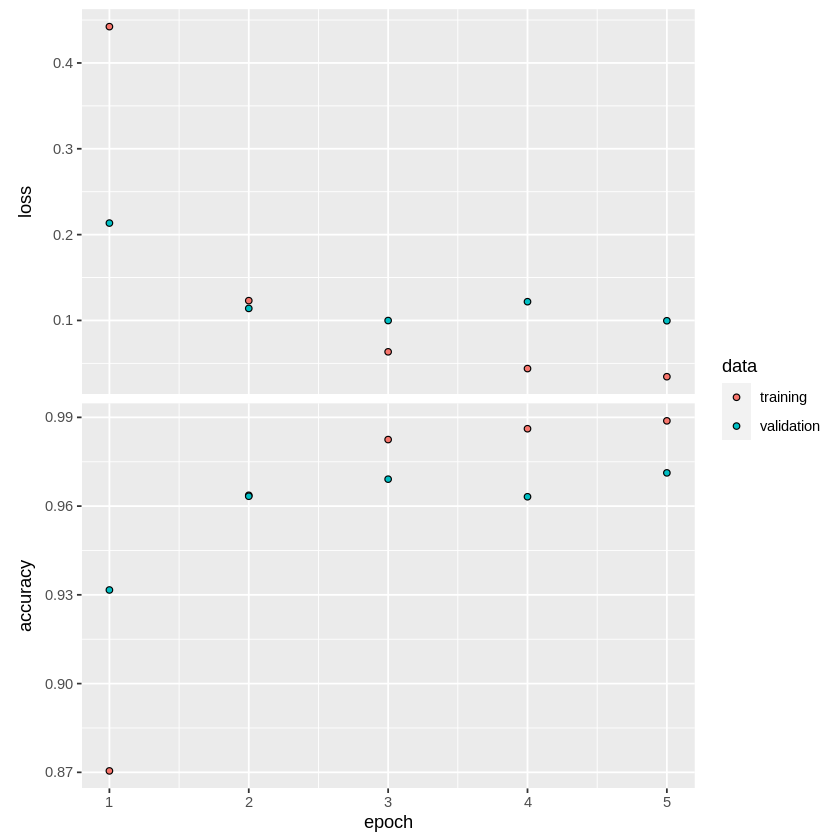

In [ ]:
plot(LeNet_history)

## Prediction

In [ ]:
y_pred <- predict(LeNet_model, X_test)
head(y_pred)

8.409779e-12,2.096387e-09,5.385237e-08,8.547891e-07,1.523609e-13,2.742917e-09,9.134248e-16,9.999990e-01,1.055572e-10,4.060833e-09
6.018916e-10,1.296391e-07,9.999999e-01,1.653427e-10,1.420648e-13,1.469945e-12,1.024773e-08,3.350828e-11,3.188975e-09,2.246008e-15
2.324488e-07,9.999516e-01,5.179486e-06,2.349716e-09,1.196981e-05,2.848232e-08,4.130856e-06,2.673381e-05,3.046873e-08,6.610993e-08
9.999894e-01,4.876717e-10,3.966691e-06,4.217164e-10,2.258448e-10,4.513825e-09,5.024511e-06,8.155488e-07,1.320499e-08,7.701590e-07
5.246849e-08,3.001642e-09,3.608322e-10,1.461299e-09,9.988324e-01,2.732771e-09,1.499965e-08,1.262081e-06,1.608362e-09,1.166312e-03
3.860166e-09,9.999971e-01,2.539651e-08,1.733531e-11,1.267034e-06,2.016713e-10,6.660898e-08,1.482304e-06,8.942052e-10,3.040949e-09


In [ ]:
table(argmax(y_test), argmax(y_pred))

    
        1    2    3    4    5    6    7    8    9   10
  1   966    0    1    0    0    0    5    5    3    0
  2     0 1124    3    1    0    1    4    2    0    0
  3     3    2 1019    2    0    0    3    1    2    0
  4     0    0   11  974    0   11    0    8    6    0
  5     1    1    2    0  965    0    4    4    1    4
  6     2    0    2    4    0  863   14    5    2    0
  7     3    4    0    0    1    1  948    0    1    0
  8     0    5   18    0    1    0    0 1002    1    1
  9     1    1    5    4    2    0    7    7  945    2
  10    3    7    2    3    9    5    0   12    3  965

# Augmentation


## Model

In [ ]:
# Build the Keras Sequential model
LeNet_Augmentation_model <- keras_model_sequential()

LeNet_Augmentation_model %>%
  layer_conv_2d(filters = 20, # 20 output channels (or output filters)
                kernel_size = c(5,5), # 5x5 convolution
                activation = 'relu',
                input_shape = c(28,28,1)) %>%
  layer_max_pooling_2d(pool_size = c(2,2), strides=c(2, 2)) %>%
  layer_conv_2d(filters = 50,
                kernel_size = c(5,5),
                activation = 'relu') %>%
  layer_max_pooling_2d(pool_size = c(2,2), strides=c(2, 2)) %>%
  layer_flatten() %>%
  layer_dense(units = 500, activation = 'relu') %>%
  layer_dense(units = 10, activation = 'softmax')


# compile model
LeNet_Augmentation_model %>% compile(
  loss = 'categorical_crossentropy', #some other options: sparse_categorical_crossentropy
  optimizer = optimizer_adam(), #or: SGD, RMSProp
  metrics = c('accuracy'))

summary(LeNet_Augmentation_model)

Model: "sequential_5"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d_3 (Conv2D)                  (None, 24, 24, 20)              520         
 max_pooling2d_3 (MaxPooling2D)     (None, 12, 12, 20)              0           
 conv2d_2 (Conv2D)                  (None, 8, 8, 50)                25050       
 max_pooling2d_2 (MaxPooling2D)     (None, 4, 4, 50)                0           
 flatten_1 (Flatten)                (None, 800)                     0           
 dense_11 (Dense)                   (None, 500)                     400500      
 dense_10 (Dense)                   (None, 10)                      5010        
Total params: 431080 (1.64 MB)
Trainable params: 431080 (1.64 MB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


In [ ]:
# image augmentation
datagen <- image_data_generator(
  featurewise_center=TRUE,
    featurewise_std_normalization=TRUE,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=TRUE,
    validation_split=0.9,
    data_format = 'channels_last')

In [ ]:
# Evalute the model
LeNet_Augmentation_history <- LeNet_Augmentation_model %>% fit_generator(
  generator = flow_images_from_data(x = X_train,
                                    y = y_train,
                                    generator = image_data_generator(),
                                    batch_size = 128),
  epochs = 5,
  steps_per_epoch = 100,
  verbose = 1)
  # validation_split = 0.9 already in ImageDataGenerator

Warning message in fit_generator(., generator = flow_images_from_data(x = X_train, :
“`fit_generator` is deprecated. Use `fit` instead, it now accept generators.”


## Prediction

In [ ]:
y_pred <- predict(LeNet_Augmentation_model, X_test)
head(y_pred)

9.042687e-07,5.092705e-07,9.444663e-05,6.056688e-04,3.438048e-09,1.536825e-07,6.827874e-13,9.992977e-01,1.037560e-08,6.289563e-07
2.679072e-04,8.736007e-04,9.987248e-01,1.295325e-05,1.694163e-08,2.173996e-08,5.746789e-05,5.422770e-08,6.316448e-05,1.199998e-10
1.252857e-05,9.996639e-01,7.257913e-06,4.983535e-06,8.358400e-05,2.862390e-06,3.412944e-05,1.777121e-04,9.302421e-06,3.658132e-06
9.999886e-01,9.130701e-09,3.063100e-06,1.186895e-08,1.724838e-07,1.867356e-07,6.885229e-06,7.272802e-07,1.299548e-07,2.336901e-07
4.820453e-07,3.299257e-06,1.081615e-07,5.345509e-07,9.999794e-01,3.825256e-08,1.002199e-06,2.175223e-06,8.464267e-07,1.214995e-05
2.577062e-06,9.999282e-01,2.756503e-07,4.030503e-07,1.096360e-05,6.631802e-08,1.020381e-06,5.429080e-05,1.133577e-06,8.536076e-07


In [ ]:
table(argmax(y_test), argmax(y_pred))

    
        1    2    3    4    5    6    7    8    9   10
  1   975    1    0    0    0    0    2    2    0    0
  2     0 1132    0    2    0    0    0    1    0    0
  3     2    8 1008    1    0    0    3    6    4    0
  4     2    0    1 1000    0    2    0    3    2    0
  5     0    0    0    0  974    0    4    1    1    2
  6     2    0    0   10    0  876    3    0    1    0
  7     7    3    0    0    2    1  942    0    3    0
  8     0    5    3    1    0    0    0 1016    2    1
  9    10    2    2    1    2    1    1    4  951    0
  10    5    4    0   11   18    8    0   11    8  944